In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_2.csv' , nrows=50000)

In [3]:
df.shape

(50000, 109)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test, y_train ,y_test = train_test_split( df.drop(labels = ['target'],axis=1),
    df['target'],test_size=0.33, random_state =0)

In [6]:
x_train.shape , x_test.shape

((33500, 108), (16500, 108))

In [7]:
from sklearn.feature_selection import mutual_info_classif

In [8]:
reg = mutual_info_classif(x_train,y_train)

In [9]:
reg

array([0.00000000e+00, 3.16297974e-03, 0.00000000e+00, 1.22945579e-03,
       8.28241266e-04, 5.00844232e-03, 5.06571437e-03, 2.95220541e-03,
       0.00000000e+00, 0.00000000e+00, 6.56111444e-04, 0.00000000e+00,
       1.41713351e-03, 3.95811343e-03, 0.00000000e+00, 1.73983322e-02,
       0.00000000e+00, 0.00000000e+00, 9.61061747e-04, 0.00000000e+00,
       3.87432283e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.18197466e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.60937731e-03, 2.90424897e-03, 0.00000000e+00, 0.00000000e+00,
       3.19366442e-03, 1.88472808e-02, 1.52273555e-04, 6.04039726e-04,
       9.24728284e-04, 1.57332277e-03, 3.81101919e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.69638488e-05, 3.32745351e-03,
       2.78320676e-03, 1.40858789e-03, 0.00000000e+00, 3.27848266e-03,
       0.00000000e+00, 3.02647906e-04, 3.31574276e-04, 3.67389333e-03,
       0.00000000e+00, 3.19380973e-03, 4.11613465e-02, 3.15119711e-03,
      

Text(0, 0.5, 'values')

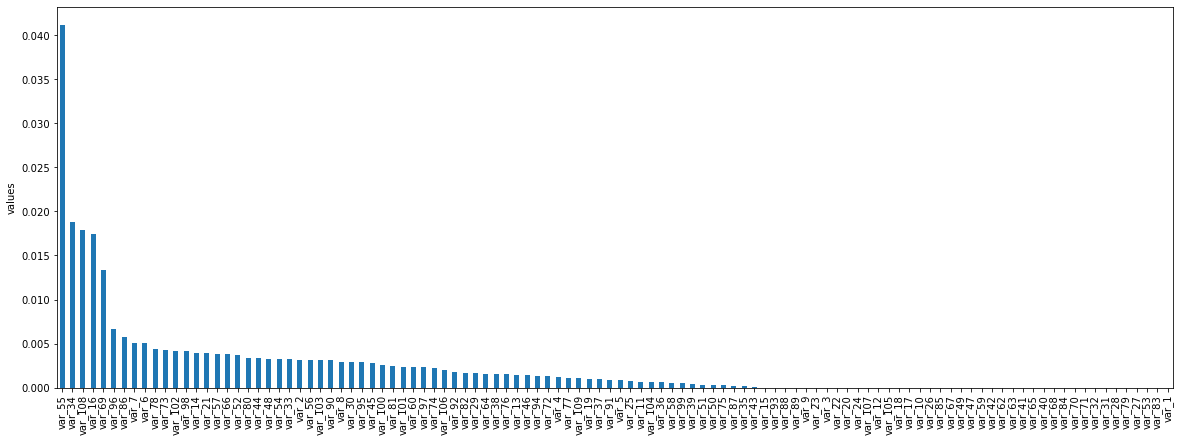

In [10]:
sol = pd.Series(reg)
sol.index = x_train.columns
sol.sort_values(ascending = False).plot.bar(figsize=(20,7))
plt.ylabel('values')

In [11]:
## Using SelectKBest we get Top categories

In [12]:
from sklearn.feature_selection import SelectKBest

In [13]:
sel = SelectKBest(mutual_info_classif,k=10)

In [14]:
sel.fit(x_train,y_train)

SelectKBest(score_func=<function mutual_info_classif at 0x000001BD0FCA33A0>)

In [15]:
x_train.columns[sel.get_support()]

Index(['var_6', 'var_7', 'var_16', 'var_34', 'var_48', 'var_55', 'var_69',
       'var_86', 'var_96', 'var_108'],
      dtype='object')

In [16]:
x_train = sel.transform(x_train)

In [17]:
x_test = sel.transform(x_test)

In [18]:
x_train =pd.DataFrame(x_train,columns=['var_6', 'var_7', 'var_16', 'var_34', 'var_55', 'var_69', 'var_73',
       'var_86', 'var_96', 'var_108'])